In [21]:
# JM: 24 Oct 2020
# sample commands to plot jra55 data

%matplotlib inline

import xarray as xr

# cartopy puts things on maps by transforming data co-ordinates etc
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from draw_clock import draw_clock
import cmocean

import numpy as np
import matplotlib.pyplot as plt

print("NOTE: the cycling routines in xarray seems to make the memory use go up quite a bit")
print("NOTE: consider restarting after every round to keep memory usage under control")
print(" ")
print("to make movies, I used e.g. \"ffmpeg -framerate 24 -i prra_day_avg_%04d.png prra_day_avg_2018.mp4\" in linux")
print(" ")

NOTE: the cycling routines in xarray seems to make the memory use go up quite a bit
NOTE: consider restarting after every round to keep memory usage under control
 
to make movies, I used "ffmpeg -framerate 24 -i prra_day_avg_%04d.png prra_day_avg_2018.mp4" in linux
 


In [2]:
# define some defaults
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["image.cmap"] = "RdBu_r" # \"*_r\" is reverse of standard colour\n",
plt.rcParams["axes.formatter.limits"] = [-3, 3]
plt.rcParams["font.size"] = 12.0

# define the folder directory where jra data are
data_dir = "/home/jclmak/data/jra55/input4MIPs/"

pcarree = ccrs.PlateCarree()

In [3]:
# open shortwave radiation data
ds = xr.open_dataset(data_dir + "rsds/rsds_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_201801010130-201812312230.nc")
lon  = ds["lon"]
lat  = ds["lat"]
time = ds["time"]
data = ds["rsds"]

field_label = r"$Q_{\rm sw}$"
units = r"${\rm W\ m^{-2}}$"
cmap = cmocean.cm.solar

outputted files


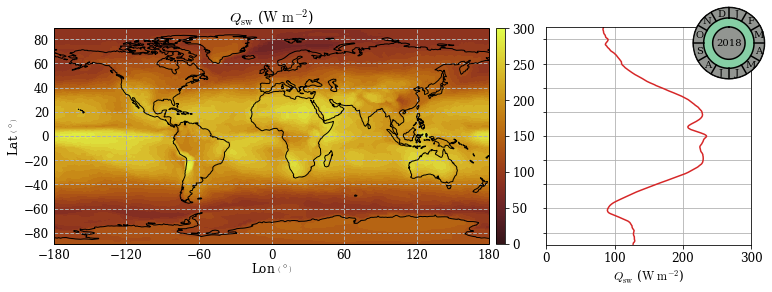

In [4]:
# plot the year-averaged shortwave radiation

vmin = 0.0
vmax = 300.0

plot_data = data.mean(dim="time")

fig = plt.figure(figsize=(12.5, 4))
ax = plt.subplot2grid((1, 3), (0, 0), colspan=2, projection=pcarree)
mesh = ax.contourf(lon, lat, plot_data, levels=np.linspace(vmin, vmax, 30), cmap=cmap, extend="both")
ax.set_ylim([-89, 89])
ax.add_feature(cartopy.feature.COASTLINE, zorder = 10, edgecolor = 'k')
for c in mesh.collections:
    c.set_edgecolor("face")
gl = ax.gridlines(crs=pcarree,
                  linewidth = 1, linestyle = '--')
gl.ylabels_left = True
gl.xlabels_bottom = True
norm = Normalize(vmin = vmin, vmax = vmax)
colors = cmap(np.linspace(0, 1, cmap.N))
cmap2 = LinearSegmentedColormap.from_list('Upper Half', colors)
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes("right", size = "2%", pad = 0.1, axes_class=plt.Axes)
cb = ColorbarBase(ax_cb, cmap = cmap2, norm = norm)
ax.set_title(field_label + " (" + units + ")")

ax.text(-0.075, 0.5, r'Lat $\left( {}^\circ \right)$', 
                    va='bottom', ha='center',
                    rotation=90, rotation_mode='anchor',
                    transform=ax.transAxes)
ax.text(0.5, -0.15, r'Lon $\left( {}^\circ \right)$', 
                   va='bottom', ha='center',
                   rotation='horizontal', rotation_mode='anchor',
                   transform=ax.transAxes)

ax = plt.subplot2grid((1, 3), (0, 2), colspan=1)
lines = ax.plot(plot_data.mean(dim="lon"), lat, "C3")
ax.set_ylim([-90, 90])
ax.set_xlim([vmin, vmax])
ax.set_xlabel(field_label + " (" + units + ")")
ax.set_yticklabels([])
ax.grid()

clock_ax = plt.axes([0.75, 0.7, 0.25, .25], polar = True)

raw_time_str = time.isel(time=1).data # daily average, just use the day
yymmdd = "".join(np.datetime_as_string(raw_time_str, unit='D').split("-"))
draw_clock(yymmdd, ax = clock_ax, fontsize = 10)

plt.savefig(f"pics/rsds_year_avg.png", dpi = 75, bbox_inches = "tight")
    
print("outputted files")

In [4]:
# plotting the daily-averaged shortwave radiation

count = 1

vmin = 0.0
vmax = 400.0
levels = np.linspace(vmin, vmax, 30)

for i in range(0, len(time), 8):
    
    # average over a day (3-hourly data so 8 units in a day)
    time_int = np.arange(i, i+8)
    plot_data = data.isel(time=time_int).mean(dim="time")

    fig = plt.figure(figsize=(12.5, 4))
    ax = plt.subplot2grid((1, 3), (0, 0), colspan=2, projection=pcarree)
    mesh = ax.contourf(lon, lat, plot_data, levels=levels, cmap=cmap, extend="both")
    ax.set_ylim([-89, 89])
    ax.add_feature(cartopy.feature.COASTLINE, zorder = 10, edgecolor = 'k')
    for c in mesh.collections:
        c.set_edgecolor("face")
    gl = ax.gridlines(crs=pcarree,
                      linewidth = 1, linestyle = '--')
    gl.ylabels_left = True
    gl.xlabels_bottom = True
    norm = Normalize(vmin = vmin, vmax = vmax)
    colors = cmap(np.linspace(0, 1, cmap.N))
    cmap2 = LinearSegmentedColormap.from_list('Upper Half', colors)
    divider = make_axes_locatable(ax)
    ax_cb = divider.append_axes("right", size = "2%", pad = 0.1, axes_class=plt.Axes)
    cb = ColorbarBase(ax_cb, cmap = cmap2, norm = norm)
    ax.set_title(field_label + " (" + units + ")")

    ax.text(-0.075, 0.5, r'Lat $\left( {}^\circ \right)$', 
                        va='bottom', ha='center',
                        rotation=90, rotation_mode='anchor',
                        transform=ax.transAxes)
    ax.text(0.5, -0.15, r'Lon $\left( {}^\circ \right)$', 
                       va='bottom', ha='center',
                       rotation='horizontal', rotation_mode='anchor',
                       transform=ax.transAxes)

    ax = plt.subplot2grid((1, 3), (0, 2), colspan=1)
    lines = ax.plot(plot_data.mean(dim="lon"), lat, "C3")
    ax.set_ylim([-90, 90])
    ax.set_xlim([vmin, vmax])
    ax.set_xlabel(field_label + " (" + units + ")")
    ax.set_yticklabels([])
    ax.grid()

    clock_ax = plt.axes([0.75, 0.7, 0.25, .25], polar = True)

    raw_time_str = time.isel(time=i).data # daily average, just use the day
    yymmdd = "".join(np.datetime_as_string(raw_time_str, unit='D').split("-"))
    draw_clock(yymmdd, ax = clock_ax, fontsize = 10)

    plt.savefig(f"pics/rsds_day_avg_{count:04}.png", dpi = 75, bbox_inches = "tight")
    count += 1
    
    if count % 30 == 0:
        print(f"working at count = {count} (of around 365)")
    
    plt.close()
    
print("outputted files")

working at count = 30 (of around 365)
working at count = 60 (of around 365)
working at count = 90 (of around 365)
working at count = 120 (of around 365)
working at count = 150 (of around 365)
working at count = 180 (of around 365)
working at count = 210 (of around 365)
working at count = 240 (of around 365)
working at count = 270 (of around 365)
working at count = 300 (of around 365)
working at count = 330 (of around 365)
working at count = 360 (of around 365)
outputted files


In [3]:
# open SST
ds = xr.open_dataset(data_dir + "ts_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0_gr_201801010000-201812312100.nc")
lon  = ds["lon"]
lat  = ds["lat"]
time = ds["time"]
data = ds["ts"]

field_label = r"SST"
units = r"${}^\circ{\rm C}$"
cmap = cmocean.cm.thermal

outputted files


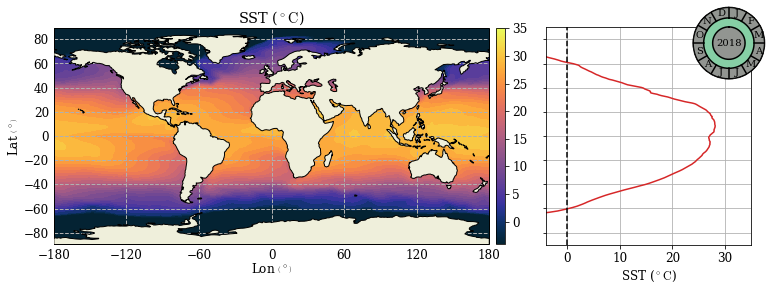

In [4]:
# plot year-averaged SST data

vmin = -4.0
vmax = 35.0

plot_data = data.mean(dim="time") - 273.15

fig = plt.figure(figsize=(12.5, 4))
ax = plt.subplot2grid((1, 3), (0, 0), colspan=2, projection=pcarree)
mesh = ax.contourf(lon, lat, plot_data, levels=np.linspace(vmin, vmax, 30), cmap=cmap, extend="both")
ax.set_ylim([-89, 89])
ax.add_feature(cartopy.feature.LAND, zorder = 10, edgecolor = 'k')
for c in mesh.collections:
    c.set_edgecolor("face")
gl = ax.gridlines(crs=pcarree,
                  linewidth = 1, linestyle = '--')
gl.ylabels_left = True
gl.xlabels_bottom = True
norm = Normalize(vmin = vmin, vmax = vmax)
colors = cmap(np.linspace(0, 1, cmap.N))
cmap2 = LinearSegmentedColormap.from_list('Upper Half', colors)
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes("right", size = "2%", pad = 0.1, axes_class=plt.Axes)
cb = ColorbarBase(ax_cb, cmap = cmap2, norm = norm)
ax.set_title(field_label + " (" + units + ")")

ax.text(-0.075, 0.5, r'Lat $\left( {}^\circ \right)$', 
                    va='bottom', ha='center',
                    rotation=90, rotation_mode='anchor',
                    transform=ax.transAxes)
ax.text(0.5, -0.15, r'Lon $\left( {}^\circ \right)$', 
                   va='bottom', ha='center',
                   rotation='horizontal', rotation_mode='anchor',
                   transform=ax.transAxes)

ax = plt.subplot2grid((1, 3), (0, 2), colspan=1)
lines = ax.plot(plot_data.mean(dim="lon"), lat, "C3")
ax.plot([0, 0], [-90, 90], 'k--')
ax.set_ylim([-90, 90])
ax.set_xlim([vmin, vmax])
ax.set_xlabel(field_label + " (" + units + ")")
ax.set_yticklabels([])
ax.grid()

clock_ax = plt.axes([0.75, 0.7, 0.25, .25], polar = True)

raw_time_str = time.isel(time=1).data
yymmdd = "".join(np.datetime_as_string(raw_time_str, unit='D').split("-"))
draw_clock(yymmdd, ax = clock_ax, fontsize = 10)

plt.savefig(f"pics/sst_year_avg.png", dpi = 75, bbox_inches = "tight")
    
print("outputted files")

In [5]:
# plot daily-averaged SST data
count = 1

vmin = -4.0
vmax = 35.0
levels = np.linspace(vmin, vmax, 30)
for i in range(0, len(time), 8):

    # average over a day (3-hourly data so 8 units in a day)
    time_int = np.arange(i, i+8)
    plot_data = data.isel(time=time_int).mean(dim="time") - 273.15

    fig = plt.figure(figsize=(12.5, 4))
    ax = plt.subplot2grid((1, 3), (0, 0), colspan=2, projection=pcarree)
    mesh = ax.contourf(lon, lat, plot_data, levels=levels, cmap=cmap, extend="both")
    ax.set_ylim([-89, 89])
    ax.add_feature(cartopy.feature.LAND, zorder = 10, edgecolor = 'k')
    for c in mesh.collections:
        c.set_edgecolor("face")
    gl = ax.gridlines(crs=pcarree,
                      linewidth = 1, linestyle = '--')
    gl.ylabels_left = True
    gl.xlabels_bottom = True
    norm = Normalize(vmin = vmin, vmax = vmax)
    colors = cmap(np.linspace(0, 1, cmap.N))
    cmap2 = LinearSegmentedColormap.from_list('Upper Half', colors)
    divider = make_axes_locatable(ax)
    ax_cb = divider.append_axes("right", size = "2%", pad = 0.1, axes_class=plt.Axes)
    cb = ColorbarBase(ax_cb, cmap = cmap2, norm = norm)
    ax.set_title(field_label + " (" + units + ")")

    ax.text(-0.075, 0.5, r'Lat $\left( {}^\circ \right)$', 
                        va='bottom', ha='center',
                        rotation=90, rotation_mode='anchor',
                        transform=ax.transAxes)
    ax.text(0.5, -0.15, r'Lon $\left( {}^\circ \right)$', 
                       va='bottom', ha='center',
                       rotation='horizontal', rotation_mode='anchor',
                       transform=ax.transAxes)

    ax = plt.subplot2grid((1, 3), (0, 2), colspan=1)
    lines = ax.plot(plot_data.mean(dim="lon"), lat, "C3")
    ax.plot([0, 0], [-90, 90], 'k--')
    ax.set_ylim([-90, 90])
    ax.set_xlim([vmin, vmax])
    ax.set_xlabel(field_label + " (" + units + ")")
    ax.set_yticklabels([])
    ax.grid()

    clock_ax = plt.axes([0.75, 0.7, 0.25, .25], polar = True)

    raw_time_str = time.isel(time=i).data
    yymmdd = "".join(np.datetime_as_string(raw_time_str, unit='D').split("-"))
    draw_clock(yymmdd, ax = clock_ax, fontsize = 10)

    plt.savefig(f"pics/sst_day_avg_{count:04}.png", dpi = 75, bbox_inches = "tight")
    count += 1
    
    if count % 30 == 0:
        print(f"working at count = {count} (of around 365)")
    
    plt.close()
    
print("outputted files")

working at count = 30 (of around 365)
working at count = 60 (of around 365)
working at count = 90 (of around 365)
working at count = 120 (of around 365)
working at count = 150 (of around 365)
working at count = 180 (of around 365)
working at count = 210 (of around 365)
working at count = 240 (of around 365)
working at count = 270 (of around 365)
working at count = 300 (of around 365)
working at count = 330 (of around 365)
working at count = 360 (of around 365)
outputted files


In [3]:
# open rain flux data
ds = xr.open_dataset(data_dir + "prra/prra_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_201801010130-201812312230.nc")
lon  = ds["lon"]
lat  = ds["lat"]
time = ds["time"]
data = ds["prra"]

field_label = r"rainfall"
units = r"${\rm kg\ m^{-2}\ s^{-1}}$"
cmap = cmocean.cm.rain

outputted files


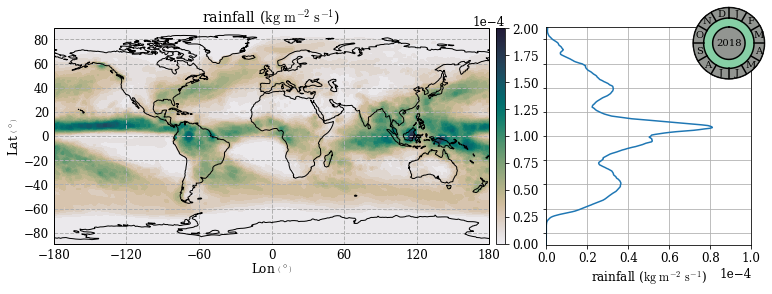

In [8]:
# plot year-averaged rainflux data

vmin = 0.0
vmax = 2e-4

plot_data = data.mean(dim="time")

fig = plt.figure(figsize=(12.5, 4))
ax = plt.subplot2grid((1, 3), (0, 0), colspan=2, projection=pcarree)
mesh = ax.contourf(lon, lat, plot_data, levels=np.linspace(vmin, vmax, 30), cmap=cmap, extend="both")
ax.set_ylim([-89, 89])
ax.add_feature(cartopy.feature.COASTLINE, zorder = 10, edgecolor = 'k')
for c in mesh.collections:
    c.set_edgecolor("face")
gl = ax.gridlines(crs=pcarree,
                  linewidth = 1, linestyle = '--')
gl.ylabels_left = True
gl.xlabels_bottom = True
norm = Normalize(vmin = vmin, vmax = vmax)
colors = cmap(np.linspace(0, 1, cmap.N))
cmap2 = LinearSegmentedColormap.from_list('Upper Half', colors)
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes("right", size = "2%", pad = 0.1, axes_class=plt.Axes)
cb = ColorbarBase(ax_cb, cmap = cmap2, norm = norm)
ax.set_title(field_label + " (" + units + ")")

ax.text(-0.075, 0.5, r'Lat $\left( {}^\circ \right)$', 
                    va='bottom', ha='center',
                    rotation=90, rotation_mode='anchor',
                    transform=ax.transAxes)
ax.text(0.5, -0.15, r'Lon $\left( {}^\circ \right)$', 
                   va='bottom', ha='center',
                   rotation='horizontal', rotation_mode='anchor',
                   transform=ax.transAxes)

ax = plt.subplot2grid((1, 3), (0, 2), colspan=1)
lines = ax.plot(plot_data.mean(dim="lon"), lat, "C0")
ax.set_ylim([-90, 90])
ax.set_xlim([vmin, 1e-4])
ax.set_xlabel(field_label + " (" + units + ")")
ax.set_yticklabels([])
ax.grid()

clock_ax = plt.axes([0.75, 0.7, 0.25, .25], polar = True)

raw_time_str = time.isel(time=1).data
yymmdd = "".join(np.datetime_as_string(raw_time_str, unit='D').split("-"))
draw_clock(yymmdd, ax = clock_ax, fontsize = 10)

plt.savefig(f"pics/prra_year_avg.png", dpi = 75, bbox_inches = "tight")
    
print("outputted files")

In [4]:
# plot daily-averaged rainflux data

count = 1

vmin = 0.0
vmax = 1e-3
levels = np.linspace(vmin, vmax, 30)

for i in range(0, len(time), 8):
    # average over a day (3-hourly data so 8 units in a day)
    time_int = np.arange(i, i+8)
    plot_data = data.isel(time=time_int).mean(dim="time")

    fig = plt.figure(figsize=(12.5, 4))
    ax = plt.subplot2grid((1, 3), (0, 0), colspan=2, projection=pcarree)
    mesh = ax.contourf(lon, lat, plot_data, levels=levels, cmap=cmap, extend="both")
    ax.set_ylim([-89, 89])
    ax.add_feature(cartopy.feature.COASTLINE, zorder = 10, edgecolor = 'k')
    for c in mesh.collections:
        c.set_edgecolor("face")
    gl = ax.gridlines(crs=pcarree,
                      linewidth = 1, linestyle = '--')
    gl.ylabels_left = True
    gl.xlabels_bottom = True
    norm = Normalize(vmin = vmin, vmax = vmax)
    colors = cmap(np.linspace(0, 1, cmap.N))
    cmap2 = LinearSegmentedColormap.from_list('Upper Half', colors)
    divider = make_axes_locatable(ax)
    ax_cb = divider.append_axes("right", size = "2%", pad = 0.1, axes_class=plt.Axes)
    cb = ColorbarBase(ax_cb, cmap = cmap2, norm = norm)
    ax.set_title(field_label + " (" + units + ")")

    ax.text(-0.075, 0.5, r'Lat $\left( {}^\circ \right)$', 
                        va='bottom', ha='center',
                        rotation=90, rotation_mode='anchor',
                        transform=ax.transAxes)
    ax.text(0.5, -0.15, r'Lon $\left( {}^\circ \right)$', 
                       va='bottom', ha='center',
                       rotation='horizontal', rotation_mode='anchor',
                       transform=ax.transAxes)

    ax = plt.subplot2grid((1, 3), (0, 2), colspan=1)
    lines = ax.plot(plot_data.mean(dim="lon"), lat, "C0")
    ax.set_ylim([-90, 90])
    ax.set_xlim([vmin, vmax / 10])
    ax.set_xlabel(field_label + " (" + units + ")")
    ax.set_yticklabels([])
    ax.grid()

    clock_ax = plt.axes([0.75, 0.7, 0.25, .25], polar = True)

    raw_time_str = time.isel(time=i).data
    yymmdd = "".join(np.datetime_as_string(raw_time_str, unit='D').split("-"))
    draw_clock(yymmdd, ax = clock_ax, fontsize = 10)

    plt.savefig(f"pics/prra_day_avg_{count:04}.png", dpi = 75, bbox_inches = "tight")
    count += 1
    
    if count % 30 == 0:
        print(f"working at count = {count} (of around 365)")
    
    plt.close()
    
print("outputted files")

working at count = 30 (of around 365)
working at count = 60 (of around 365)
working at count = 90 (of around 365)
working at count = 120 (of around 365)
working at count = 150 (of around 365)
working at count = 180 (of around 365)
working at count = 210 (of around 365)
working at count = 240 (of around 365)
working at count = 270 (of around 365)
working at count = 300 (of around 365)
working at count = 330 (of around 365)
working at count = 360 (of around 365)
outputted files


In [3]:
# open the SSS data (cheating here because it is a climatology)
ds = xr.open_dataset(data_dir + "sos_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0_gr_195501-201212-clim.nc")
lon  = ds["lon"]
lat  = ds["lat"]
time = ds["time"]
data = ds["sos"]

field_label = r"SSS"
units = r"${\rm g / kg}$"
cmap = cmocean.cm.balance

outputted files


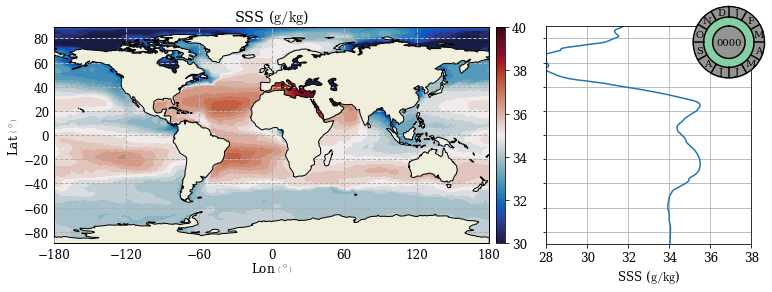

In [12]:
# plot year-averaged SSS

vmin = 30.0
vmax = 40.0

plot_data = data.mean(dim="time")

fig = plt.figure(figsize=(12.5, 4))
ax = plt.subplot2grid((1, 3), (0, 0), colspan=2, projection=pcarree)
mesh = ax.contourf(lon, lat, plot_data, levels=np.linspace(vmin, vmax, 30), cmap=cmap, extend="both")
ax.set_ylim([-89, 89])
ax.add_feature(cartopy.feature.LAND, zorder = 10, edgecolor = 'k')
for c in mesh.collections:
    c.set_edgecolor("face")
gl = ax.gridlines(crs=pcarree,
                  linewidth = 1, linestyle = '--')
gl.ylabels_left = True
gl.xlabels_bottom = True
norm = Normalize(vmin = vmin, vmax = vmax)
colors = cmap(np.linspace(0, 1, cmap.N))
cmap2 = LinearSegmentedColormap.from_list('Upper Half', colors)
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes("right", size = "2%", pad = 0.1, axes_class=plt.Axes)
cb = ColorbarBase(ax_cb, cmap = cmap2, norm = norm)
ax.set_title(field_label + " (" + units + ")")

ax.text(-0.075, 0.5, r'Lat $\left( {}^\circ \right)$', 
                    va='bottom', ha='center',
                    rotation=90, rotation_mode='anchor',
                    transform=ax.transAxes)
ax.text(0.5, -0.15, r'Lon $\left( {}^\circ \right)$', 
                   va='bottom', ha='center',
                   rotation='horizontal', rotation_mode='anchor',
                   transform=ax.transAxes)

ax = plt.subplot2grid((1, 3), (0, 2), colspan=1)
lines = ax.plot(plot_data.mean(dim="lon"), lat, "C0")
ax.set_ylim([-90, 90])
ax.set_xlim([28, 38])
ax.set_xlabel(field_label + " (" + units + ")")
ax.set_yticklabels([])
ax.grid()

clock_ax = plt.axes([0.75, 0.7, 0.25, .25], polar = True)

# raw_time_str = time.isel(time=1).data
# yymmdd = "".join(np.datetime_as_string(raw_time_str, unit='D').split("-"))
yyyymmdd = "00000101"
draw_clock(yyyymmdd, ax = clock_ax, fontsize = 10)

plt.savefig(f"pics/sss_year_avg.png", dpi = 75, bbox_inches = "tight")
    
print("outputted files")

In [19]:
# plot monthly climatology of SSS

count = 1

vmin = 30.0
vmax = 40.0
levels = np.linspace(vmin, vmax, 30)

for i in range(0, len(time)):
    # average over a day (3-hourly data so 8 units in a day)
    plot_data = data.isel(time=i)

    fig = plt.figure(figsize=(12.5, 4))
    ax = plt.subplot2grid((1, 3), (0, 0), colspan=2, projection=pcarree)
    mesh = ax.contourf(lon, lat, plot_data, levels=np.linspace(vmin, vmax, 30), cmap=cmap, extend="both")
    ax.set_ylim([-89, 89])
    ax.add_feature(cartopy.feature.LAND, zorder = 10, edgecolor = 'k')
    for c in mesh.collections:
        c.set_edgecolor("face")
    gl = ax.gridlines(crs=pcarree,
                      linewidth = 1, linestyle = '--')
    gl.ylabels_left = True
    gl.xlabels_bottom = True
    norm = Normalize(vmin = vmin, vmax = vmax)
    colors = cmap(np.linspace(0, 1, cmap.N))
    cmap2 = LinearSegmentedColormap.from_list('Upper Half', colors)
    divider = make_axes_locatable(ax)
    ax_cb = divider.append_axes("right", size = "2%", pad = 0.1, axes_class=plt.Axes)
    cb = ColorbarBase(ax_cb, cmap = cmap2, norm = norm)
    ax.set_title(field_label + " (" + units + ")")

    ax.text(-0.075, 0.5, r'Lat $\left( {}^\circ \right)$', 
                        va='bottom', ha='center',
                        rotation=90, rotation_mode='anchor',
                        transform=ax.transAxes)
    ax.text(0.5, -0.15, r'Lon $\left( {}^\circ \right)$', 
                       va='bottom', ha='center',
                       rotation='horizontal', rotation_mode='anchor',
                       transform=ax.transAxes)

    ax = plt.subplot2grid((1, 3), (0, 2), colspan=1)
    lines = ax.plot(plot_data.mean(dim="lon"), lat, "C0")
    ax.set_ylim([-90, 90])
    ax.set_xlim([28, 38])
    ax.set_xlabel(field_label + " (" + units + ")")
    ax.set_yticklabels([])
    ax.grid()

    clock_ax = plt.axes([0.75, 0.7, 0.25, .25], polar = True)
    
    for j in range(28):
        yyyymmdd = f"0000{i+1:02}{j+1:02}"
        draw_clock(yyyymmdd, ax = clock_ax, fontsize = 10)

        plt.savefig(f"pics/sss_day_avg_{count:04}.png", dpi = 75, bbox_inches = "tight")
        count += 1
    
        if count % 30 == 0:
            print(f"working at count = {count} (of around 365)")
            
        clock_ax.clear()
    
    plt.close()
    
print("outputted files")

working at count = 30 (of around 365)
working at count = 60 (of around 365)
working at count = 90 (of around 365)
working at count = 120 (of around 365)
working at count = 150 (of around 365)
working at count = 180 (of around 365)
working at count = 210 (of around 365)
working at count = 240 (of around 365)
working at count = 270 (of around 365)
working at count = 300 (of around 365)
working at count = 330 (of around 365)
outputted files


In [5]:
# sample scrap code to test out colors etc. (1)
# plot SOMETHING
ds = xr.open_dataset(data_dir + "rsds/rsds_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_201801010130-201812312230.nc")
lon  = ds["lon"]
lat  = ds["lat"]
time = ds["time"]
data = ds["rsds"]
print("finding min and max of data for setting a fixed colormap")
vmin, vmax = data.min(), data.max()

print(f"data min = {vmin}, data max = {vmax}")

finding min and max of data for setting a fixed colormap
data min = <xarray.DataArray 'rsds' ()>
array(0., dtype=float32), data max = <xarray.DataArray 'rsds' ()>
array(1553.3188, dtype=float32)


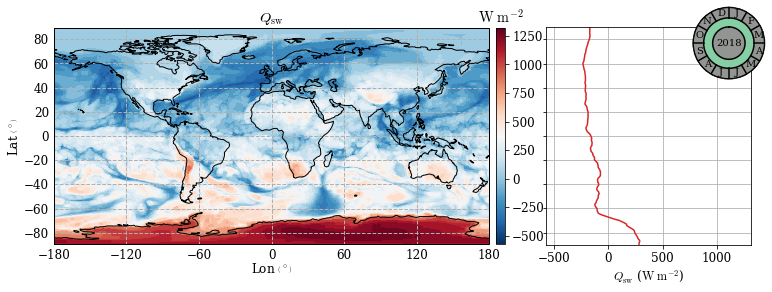

In [101]:
# sample scrap code to test out colors etc.

cmap = cm.get_cmap("RdBu_r")
count = 1

i = 9

# average over a day (3-hourly data so 8 units in a day)
time_int = np.arange(i, i+8)
plot_data = data.isel(time=time_int).mean(dim="time")

fig = plt.figure(figsize=(12.5, 4))
ax = plt.subplot2grid((1, 3), (0, 0), colspan=2, projection=pcarree)
mesh = ax.contourf(lon, lat, plot_data, levels = 30)
ax.set_ylim([-89, 89])
ax.add_feature(cartopy.feature.COASTLINE, zorder = 10, edgecolor = 'k')
for c in mesh.collections:
    c.set_edgecolor("face")
gl = ax.gridlines(crs=pcarree,
                  linewidth = 1, linestyle = '--')
gl.ylabels_left = True
gl.xlabels_bottom = True
norm = Normalize(vmin = vmin, vmax = vmax)
colors = cmap(np.linspace(0, 1, cmap.N))
cmap2 = LinearSegmentedColormap.from_list('Upper Half', colors)
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes("right", size = "2%", pad = 0.1, axes_class=plt.Axes)
cb = ColorbarBase(ax_cb, cmap = cmap2, norm = norm)
ax_cb.axes.set_title(r"${\rm W\ m^{-2}}$")
ax.set_title(r"$Q_{\rm sw}$")

ax.text(-0.075, 0.5, r'Lat $\left( {}^\circ \right)$', 
                    va='bottom', ha='center',
                    rotation=90, rotation_mode='anchor',
                    transform=ax.transAxes)
ax.text(0.5, -0.15, r'Lon $\left( {}^\circ \right)$', 
                   va='bottom', ha='center',
                   rotation='horizontal', rotation_mode='anchor',
                   transform=ax.transAxes)

ax = plt.subplot2grid((1, 3), (0, 2), colspan=1)
lines = ax.plot(plot_data.mean(dim="lon"), lat, "C3")
ax.set_ylim([-90, 90])
ax.set_xlim([vmin, vmax])
ax.set_xlabel(r"$Q_{\rm sw}$ (${\rm W\ m^{-2}}$)")
ax.set_yticklabels([])
ax.grid()

clock_ax = plt.axes([0.75, 0.7, 0.25, .25], polar = True)

raw_time_str = time.isel(time=i).data
yymmdd = "".join(np.datetime_as_string(raw_time_str, unit='D').split("-"))
draw_clock(yymmdd, ax = clock_ax, fontsize = 10)

In [71]:
hello = (dummy.astype('datetime64[m]') - np.datetime64('1970-01-01T00:00:00')) / np.timedelta64(1, 'm')

In [84]:
np.datetime_as_string(hello.mean().astype('datetime64[m]'))[:10:]

'2018-01-01'

In [78]:
np.datetime_as_string(dummy, unit='m')

array(['2018-01-01T01:30', '2018-01-01T04:30', '2018-01-01T07:30',
       '2018-01-01T10:30', '2018-01-01T13:30', '2018-01-01T16:30',
       '2018-01-01T19:30', '2018-01-01T22:30'], dtype='<U35')